In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

def load_df(filename):
    with open(f'/home/rth/Code/private/master-thesis/community-detection-benchmark/output/{filename}.json') as f:
        data = json.load(f)
    return data

def mk_seeds_str(x):
    # to make seed membeship hashable   
    x['seedMembership'] = str(x['seedMembership'])
    return x

def mk_df(data):
    # filter out when at least one seed is equal 0 - means seeds count is broken...
    old_cnt = len(data['result'])
    
    
    new_result = [mk_seeds_str(x) for x in data['result'] if all(y != 0 for y in x['realSeedCommunitySizes'])]
        
    new_data = {**data, 'result': new_result }
    
    df = pd.DataFrame(new_result)
    df = df.drop_duplicates(subset=['graph', 'algorithm', 'seedMembership'])
    
    new_cnt = df.shape[0]
    print(f'removed rows: {old_cnt - new_cnt}/{old_cnt}')
    
    return (new_data, df)


ALGO_LABELS = {
    'fastGreedy': '$CNM$',
    'louvain': '$Louvain$',
    'edgeBetweenness': '$GN$',
    
    'fastGreedySeed': '$CNM_{seed}$',
    'louvainSeed': '$Louvain_{seed}$',
    'edgeBetweennessSeed': '$GN_{seed}$' 
}

PARAM_LABELS = {
    'nmi': 'NMI',
    'ari': 'ARI',
    'communitiesCount': '# społeczności',
    'modularity': 'Modularność',
    'RANDOM': 'Losowo ($P=R$)',
    'CONNECTED': 'Spójnie ($P=C$)',
    'compositionRatioParam': '(K)',
    'seedCountParam': '($S_{c}$)'
}

def print_plots(df, data, param):
    for g in ['karate', 'dolphins', 'football', 'polbooks']:
        
        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
        main_title = g.upper()
        fig.suptitle(main_title, fontsize=22, x=0.01, weight='bold', horizontalalignment='left')
        fig.tight_layout(h_pad=3)
        
        for i, alg in enumerate(['fastGreedy', 'louvain', 'edgeBetweenness']):
            baseline = next(x for x in data['baseline'] if x['graph'] == g and x['algorithm'] == alg)[param]
            
            alg_seed = alg + 'Seed'
            curr = df[(df['graph'] == g) & (df['algorithm'] == alg_seed)]
            
            axes[0, i].set_title(ALGO_LABELS[alg_seed], fontsize=15)
            
            for (j, structure) in enumerate(['RANDOM', 'CONNECTED']):
                df_plot = curr[curr['seedStructureParam'] == structure].reset_index(drop=True)
                df_plot['index'] = df_plot.index.values
    
                seed_size_max_idxs = list(df_plot[df_plot['seedSizeParam'] == 0.5].index)
        
                max_seeds_count = df_plot['seedCountParam'].max()
    
                color = 'blue' if j == 0 else 'green'

                curr_ax = axes[j, i]
                
                pl = df_plot.plot(y=param, x='index', kind='line', ax=curr_ax,
                                  color=color, style='.-', label=PARAM_LABELS[param])
                
                pl.axhline(baseline, color="red", linestyle="--")
                    
                
                max_seeds_idxs = set()
                
                for c in range(1, max_seeds_count):
                    x = df_plot.where(df_plot['seedCountParam'] == c).last_valid_index()
                    max_seeds_idxs.add(x)
                    pl.axvline(x=x+0.5, color="purple", linestyle="--", linewidth=1)
                    
                for x in seed_size_max_idxs:
                    if x not in max_seeds_idxs:
                        pl.axvline(x=x+0.5, color="gray", linestyle="--", linewidth=0.5)
                
                ax2 = curr_ax.secondary_xaxis('top')
                max_seeds_idxs_list = list(max_seeds_idxs)

                ax2_boundares = [0] + max_seeds_idxs_list + [df_plot.shape[0]]
                ax2_boundares.sort()

                ax2_xtics_idxs = []
                ax2_xtics_labels = []

                for k in range(1, len(ax2_boundares)):
                    x = ax2_boundares[k-1]
                    x += (ax2_boundares[k] - ax2_boundares[k-1]) / 2

                    ax2_xtics_idxs.append(x)
                    ax2_xtics_labels.append(k)

                ax2.set_xlim(curr_ax.get_xlim())
                ax2.set_xticks(ax2_xtics_idxs)
                ax2.tick_params(length=0)
                ax2.set_xticklabels(ax2_xtics_labels)
                
                if i == 0:
                    ax2.set_xlabel(PARAM_LABELS['seedCountParam'], labelpad=-8, horizontalalignment='left', x=-0.07)
                
                last_ratio = -1
                xticks_idxs = []
                xticks_values = []
                
                for index, row in df_plot.iterrows():
                    ratio = row['compositionRatioParam']
                    if ratio != last_ratio:
                        if g == 'football' and (ratio != 0 and ratio != 0.5):
                            continue;
                        xticks_idxs.append(index)
                        xticks_values.append(ratio)
                        last_ratio = ratio
                
                
                axes[j, 0].set_ylabel(PARAM_LABELS[structure], size='large')
                
                axes[j, i].set_xlabel('')
                axes[j, 0].set_xlabel(PARAM_LABELS['compositionRatioParam'], labelpad=-20, horizontalalignment='left', x=-0.07)
                

                plt.sca(axes[j,i])
                plt.xticks(xticks_idxs, xticks_values, rotation=45, fontsize=9)

            

In [13]:
filename = 'benchmark-2020-08-25T07:51:21.248Z'
data = load_df(filename)

raw_df = pd.DataFrame(data['result'])
(fdata, df) = mk_df(data)

removed rows: 885/2280


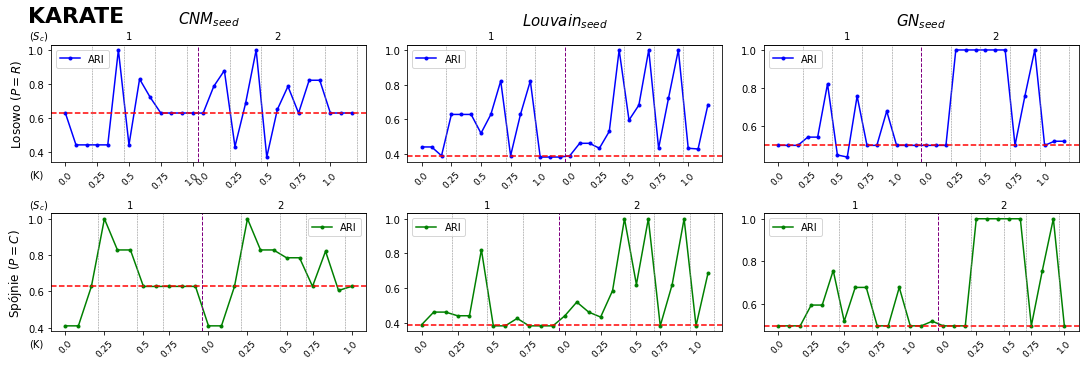

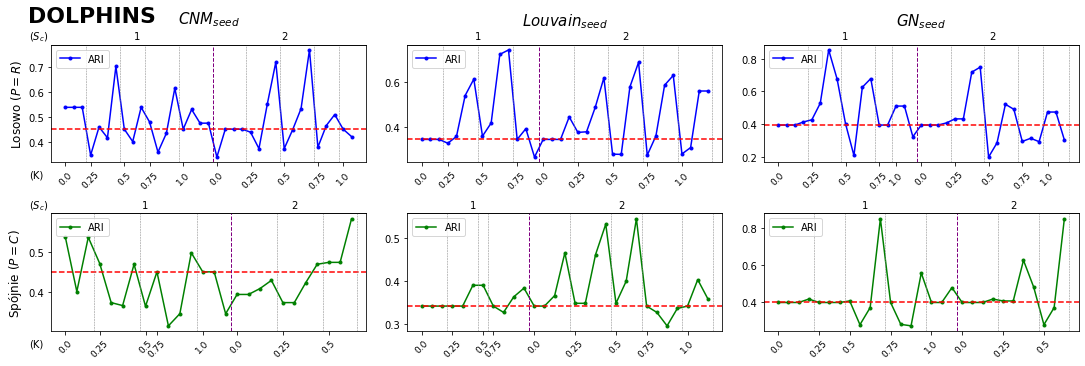

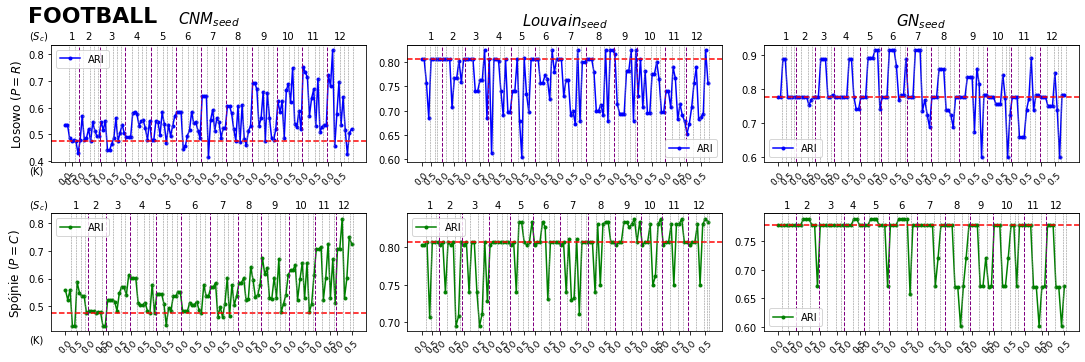

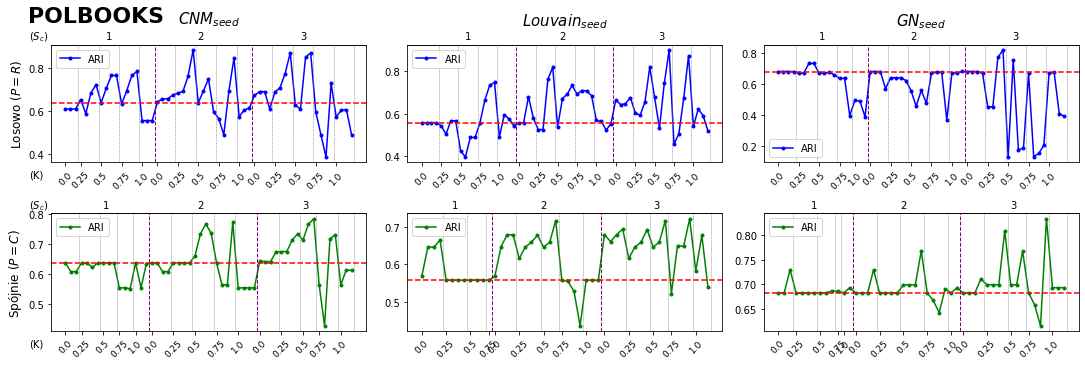

In [14]:
print_plots(df, fdata, 'ari')

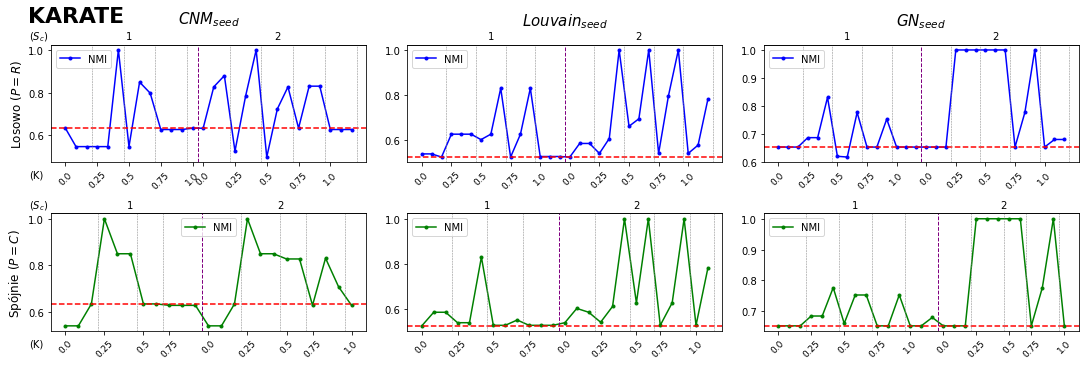

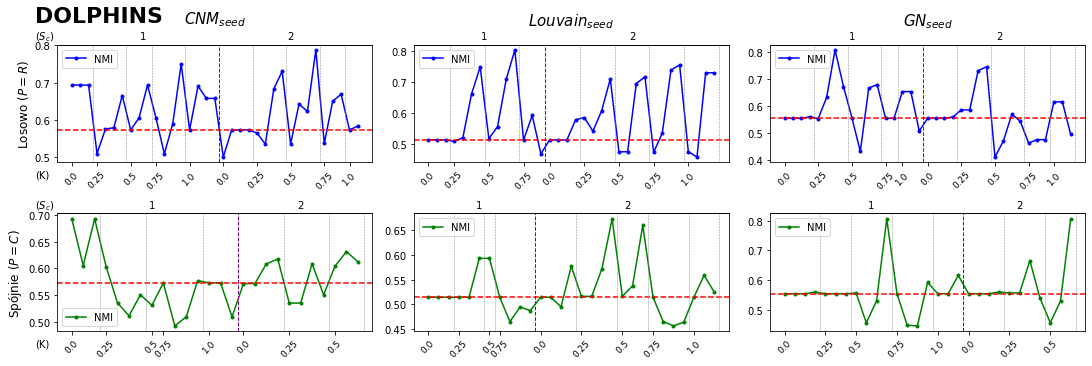

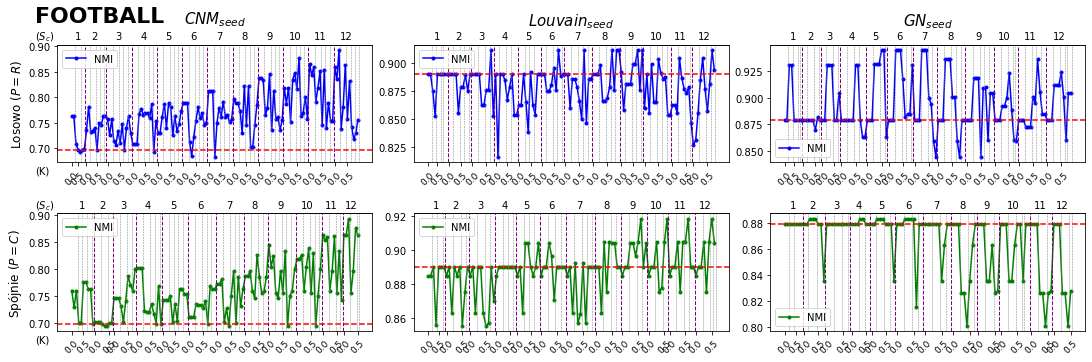

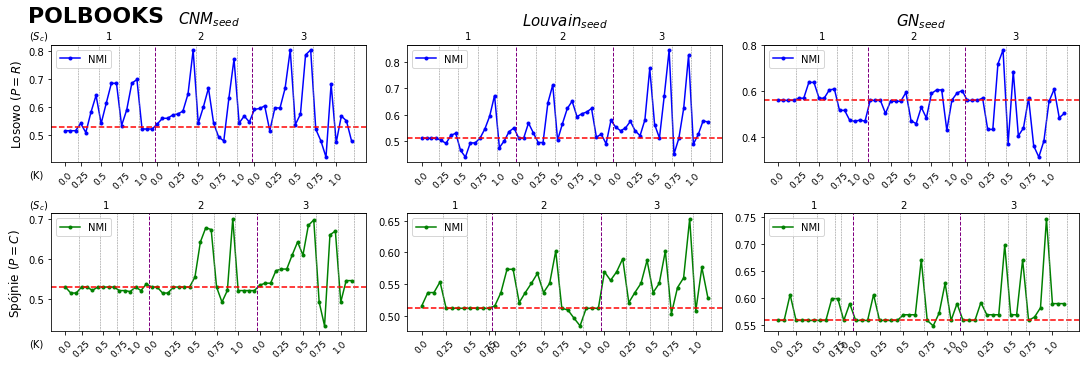

In [161]:
print_plots(df, fdata, 'nmi')

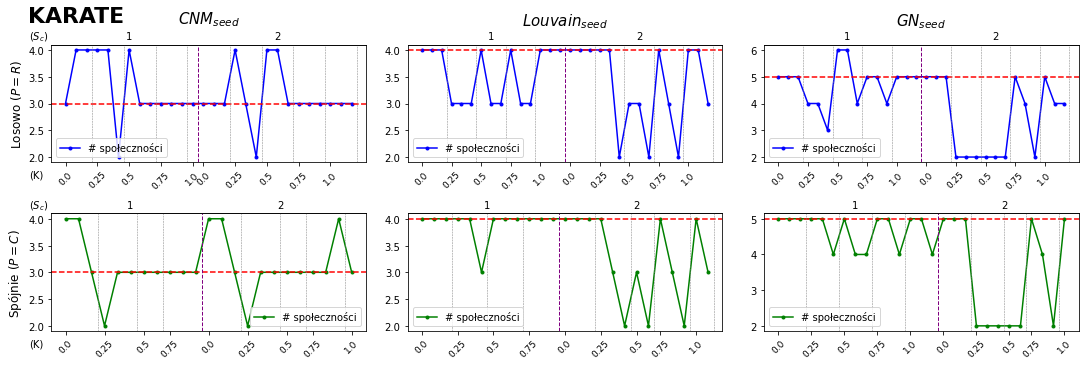

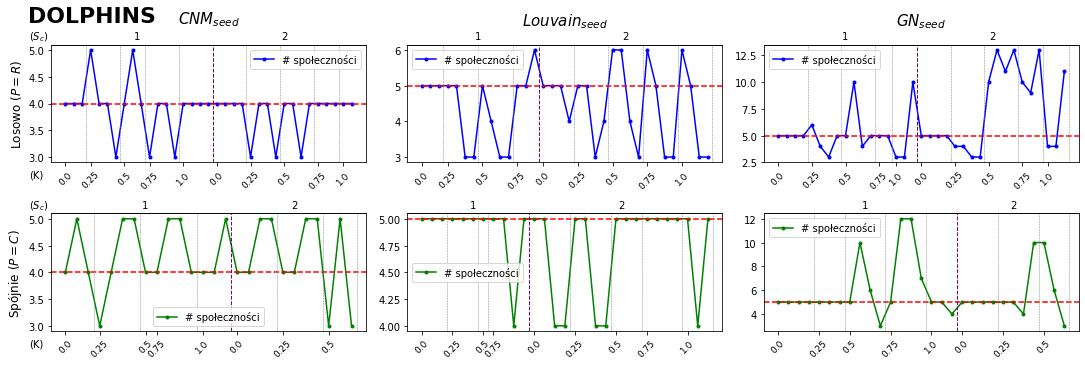

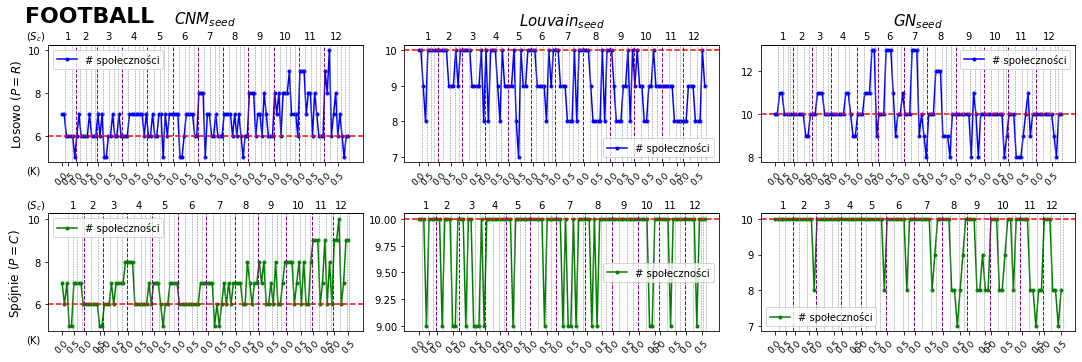

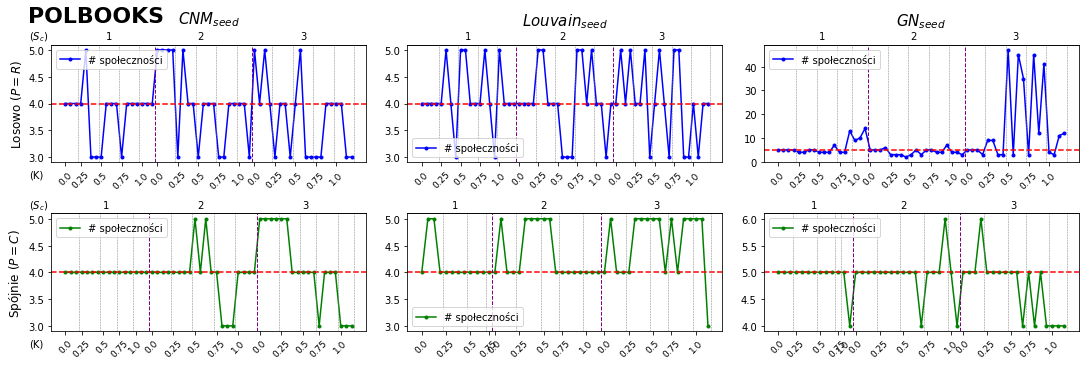

In [162]:
print_plots(df, fdata, 'communitiesCount')

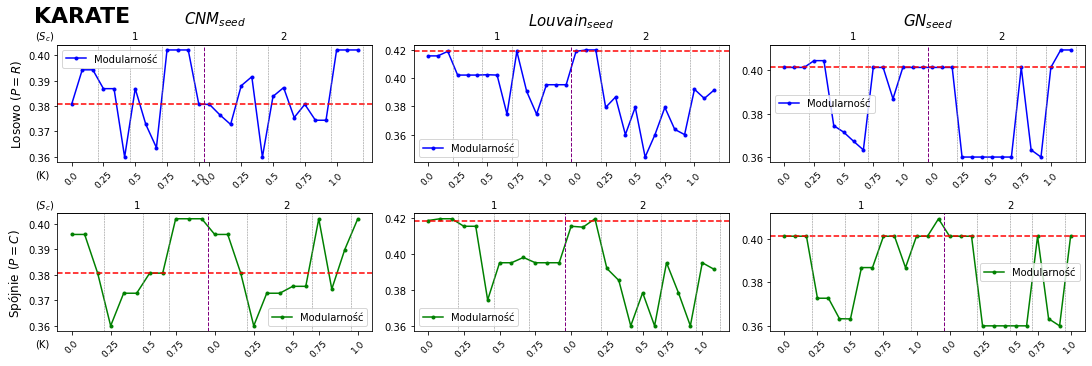

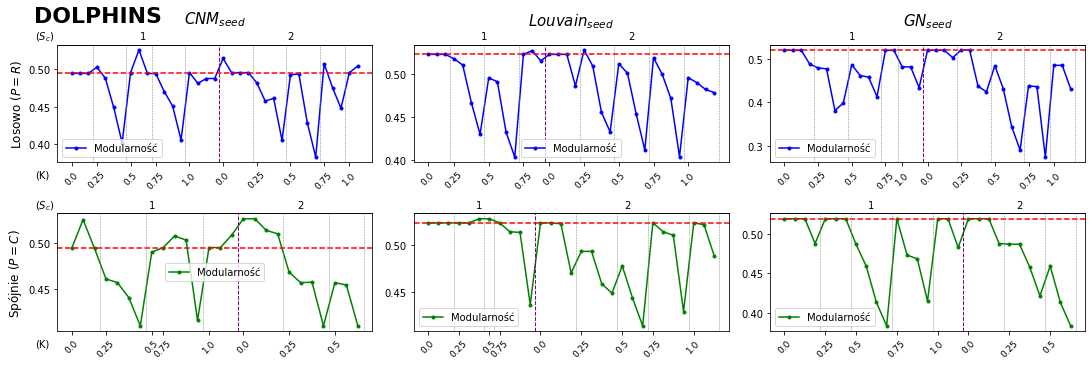

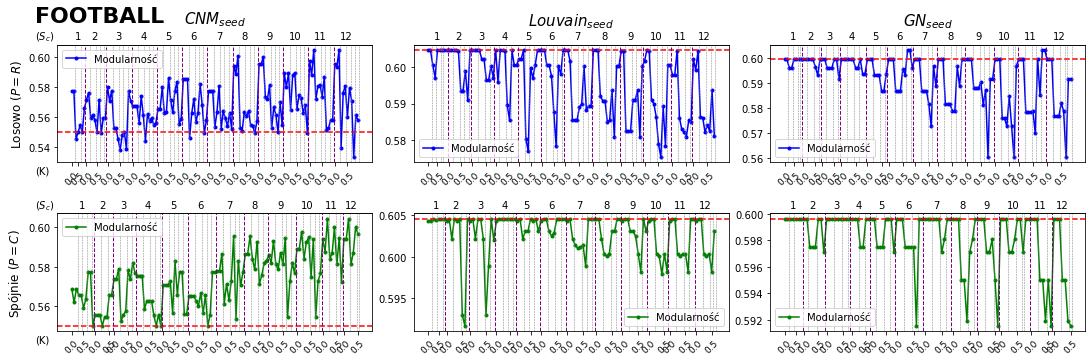

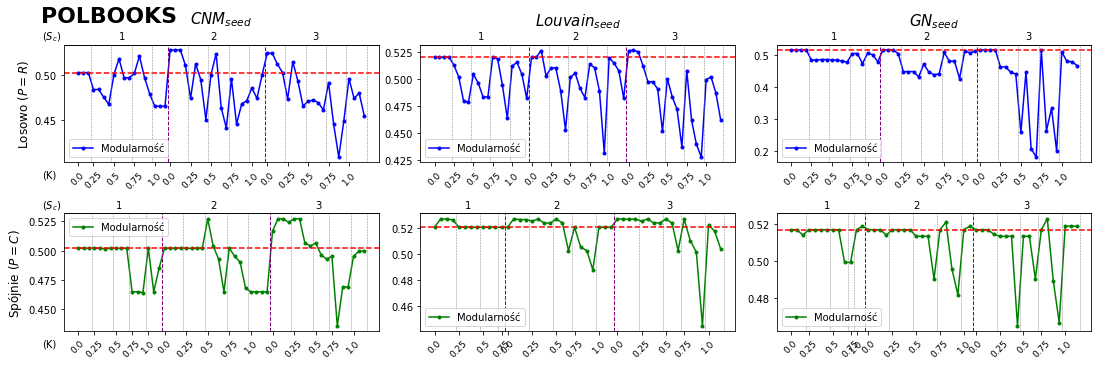

In [163]:
print_plots(df, fdata, 'modularity')

In [65]:
ALGO_LABELS = {
    'fastGreedy': 'CNM',
    'louvain': 'Louvain',
    'edgeBetweenness': 'GN',
    
    'fastGreedySeed': 'CNM\\seed',
    'louvainSeed': 'Louvain\\seed',
    'edgeBetweennessSeed': 'GN\\seed' 
}

def format_res(res, param, value):
    st = 'C' if res['seedStructureParam'] == 'Connected' else 'R'
    a = f"{ALGO_LABELS[res['algorithm']]} ($S_{{c}}={res['seedCountParam']}$, $S_{{s}}={res['seedSizeParam']}$, $K={res['compositionRatioParam']}$, $P={st}$)"
    d = {
        'algorithm': a,
        'ari': f"{res['ari']:.2f}",
        'nmi': f"{res['nmi']:.2f}",
        'modularity': f"{res['modularity']:.2f}",
        'communitiesCount': res['communitiesCount']
    }
    d[param] = f"\\textbf{{{value:.2f}}}"
    return d

def best_result(df, data):
    best = {}
    
    for g in ['karate', 'dolphins', 'football', 'polbooks']:
        best[g] = {}
        
        for i, alg in enumerate(['fastGreedy', 'louvain', 'edgeBetweenness']):
            best[g][alg] = []
            curr_best = best[g][alg]
            
            baseline = next(x for x in data['baseline'] if x['graph'] == g and x['algorithm'] == alg)
            curr_best.append({
                'algorithm': ALGO_LABELS[alg],
                'ari': f"{baseline['ari']:.2f}",
                'nmi': f"{baseline['nmi']:.2f}",
                'modularity': f"{baseline['modularity']:.2f}",
                'communitiesCount': baseline['communitiesCount']
            })
            
            alg_seed = alg + 'Seed'
            
            curr_df = df[(df['graph'] == g) & (df['algorithm'] == alg_seed)]\
                .sort_values(by=['seedStructureParam'], ascending=True)\
                .reset_index(drop=True)

            for param in ['ari', 'nmi', 'modularity']:
                column = curr_df[param]
                max_index = column.idxmax()
                res = curr_df.iloc[max_index]
                curr_best.append(format_res(res, param, res[param]))
        
    return best

                
def print_best_table(best):
    print('\\begin{table}[h!]')
    print('    \\centering')
    print('    \\caption{Porównanie najlepszych wyników indeksu ARI, NMI oraz modularności. Obok nazw naszych algorytmów, w nawiasach podane są parametry społeczności źródłowych.}')
    print('    \\begin{tabular}{l || l | c c c c} ')
    
    print('    Sieć & Algorytm & ARI & NMI & Q & \# społ. \\\\')
    print('    \\hline')
    print('    \\hline')
    
    for g in ['karate', 'dolphins', 'football', 'polbooks']:
        for i, alg in enumerate(['fastGreedy', 'louvain', 'edgeBetweenness']):
            prev_alg = ''
            for j, r in enumerate(best[g][alg]):
                g_str = f"\\textbf{{{g.capitalize()}}}" if i == 0 and j == 0 else ''
                alg = r['algorithm']
                if prev_alg != alg:
                    print(f"    {g_str} & {alg} & {r['ari']} & {r['nmi']} & {r['modularity']} & {r['communitiesCount']} \\\\")
                prev_alg = alg
            if i != 2:
                print('    &&&&&\\\\') 
        print('    \\hline')
    
    print('    \\end{tabular}')
    print('\\end{table}')

In [268]:
print_best_table(best_result(df, fdata))

\begin{table}[h!]
    \centering
    \caption{Porównanie najlepszych wyników indeksu ARI, NMI oraz modularności. Obok nazw naszych algorytmów, w nawiasach podane są parametry społeczności źródłowych.}
    \begin{tabular}{l || l | c c c c} 
    Sieć & Algorytm & ARI & NMI & Q & \# społ. \\
    \hline
    \hline
    \textbf{Karate} & CNM & 0.63 & 0.63 & 0.38 & 3 \\
     & CNM\seed ($S_{c}=1$, $S_{s}=0.05$, $K=0.25$, $P=R$) & \textbf{1.00} & 1.00 & 0.36 & 2 \\
     & CNM\seed ($S_{c}=2$, $S_{s}=0.25$, $K=1.0$, $P=R$) & 0.63 & 0.63 & \textbf{0.40} & 3 \\
    &&&&&\\
     & Louvain & 0.39 & 0.53 & 0.42 & 4 \\
     & Louvain\seed ($S_{c}=2$, $S_{s}=0.5$, $K=0.25$, $P=R$) & \textbf{1.00} & 1.00 & 0.36 & 2 \\
     & Louvain\seed ($S_{c}=1$, $S_{s}=0.5$, $K=0.0$, $P=R$) & 0.46 & 0.59 & \textbf{0.42} & 4 \\
    &&&&&\\
     & GN & 0.50 & 0.65 & 0.40 & 5 \\
     & GN\seed ($S_{c}=2$, $S_{s}=0.5$, $K=0.75$, $P=R$) & \textbf{1.00} & 1.00 & 0.36 & 2 \\
     & GN\seed ($S_{c}=1$, $S_{s}=0.5$, $K=1.0$

In [39]:
def print_plots_q_not_worse(df, data, param):
    for g in ['karate', 'dolphins', 'football', 'polbooks']:
        
        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
        main_title = g.upper()
        fig.suptitle(main_title, fontsize=22, x=0.01, weight='bold', horizontalalignment='left')
        fig.tight_layout(h_pad=3)
        
        for i, alg in enumerate(['fastGreedy', 'louvain', 'edgeBetweenness']):
            baseline = next(x for x in data['baseline'] if x['graph'] == g and x['algorithm'] == alg)
            bp = baseline[param]
            bq = baseline['modularity']
            
            
            alg_seed = alg + 'Seed'
            curr = df[(df['graph'] == g) & (df['algorithm'] == alg_seed) & (df['modularity'] >= bq)]
            
            axes[0, i].set_title(ALGO_LABELS[alg_seed], fontsize=15)
            
            for (j, structure) in enumerate(['RANDOM', 'CONNECTED']):
                df_plot = curr[curr['seedStructureParam'] == structure].reset_index(drop=True)
                df_plot['index'] = df_plot.index.values
    
                seed_size_max_idxs = list(df_plot[df_plot['seedSizeParam'] == 0.5].index)
        
                max_seeds_count = df_plot['seedCountParam'].max()
    
                color = 'blue' if j == 0 else 'green'

                curr_ax = axes[j, i]
                
                pl = df_plot.plot(y=param, x='index', kind='line', ax=curr_ax,
                                  color=color, style='.-', label=PARAM_LABELS[param])
                
                pl = df_plot.plot(y='modularity', x='index', kind='line', ax=curr_ax,
                                  color='purple', style='.-', label=PARAM_LABELS['modularity'])
                
                pl.axhline(bp, color="red", linestyle="--", label=f"{PARAM_LABELS[param]} baseline")
                pl.axhline(bq, color="orange", linestyle="--", label="Q baseline")
                    
                
                max_seeds_idxs = set()
                seeds_idxs_vals = {}
                for c in range(1, max_seeds_count):
                    x = df_plot.where(df_plot['seedCountParam'] == c).last_valid_index()
                    if x is not None:
                        max_seeds_idxs.add(x)
                        seeds_idxs_vals[x] = c
                        pl.axvline(x=x+0.5, color="purple", linestyle="--", linewidth=1)
                    
                for x in seed_size_max_idxs:
                    if x not in max_seeds_idxs:
                        pl.axvline(x=x+0.5, color="gray", linestyle="--", linewidth=0.5)
                
                ax2 = curr_ax.secondary_xaxis('top')
                max_seeds_idxs_list = list(max_seeds_idxs)

                ax2_boundares = [0] + max_seeds_idxs_list + [df_plot.shape[0]]
                ax2_boundares.sort()

                ax2_xtics_idxs = []
                ax2_xtics_labels = []

                for k in range(1, len(ax2_boundares)):
                    x = ax2_boundares[k-1]
                    x += (ax2_boundares[k] - ax2_boundares[k-1]) / 2

                    ax2_xtics_idxs.append(x)
                    ax2_xtics_labels.append(k)

                ax2.set_xlim(curr_ax.get_xlim())
                ax2.set_xticks(ax2_xtics_idxs)
                ax2.tick_params(length=0)
                ax2.set_xticklabels(ax2_xtics_labels)
                
                if i == 0:
                    ax2.set_xlabel(PARAM_LABELS['seedCountParam'], labelpad=-8, horizontalalignment='left', x=-0.07)
                
                last_ratio = -1
                xticks_idxs = []
                xticks_values = []
                
                for index, row in df_plot.iterrows():
                    ratio = row['compositionRatioParam']
                    if ratio != last_ratio:
                        if g == 'football' and (ratio != 0 and ratio != 0.5):
                            continue;
                        xticks_idxs.append(index)
                        xticks_values.append(ratio)
                        last_ratio = ratio
                
                
                axes[j, 0].set_ylabel(PARAM_LABELS[structure], size='large')
                
                axes[j, i].set_xlabel('')
                axes[j, 0].set_xlabel(PARAM_LABELS['compositionRatioParam'], labelpad=-20, horizontalalignment='left', x=-0.07)
                

                plt.sca(axes[j,i])
                plt.xticks(xticks_idxs, xticks_values, rotation=45, fontsize=9)


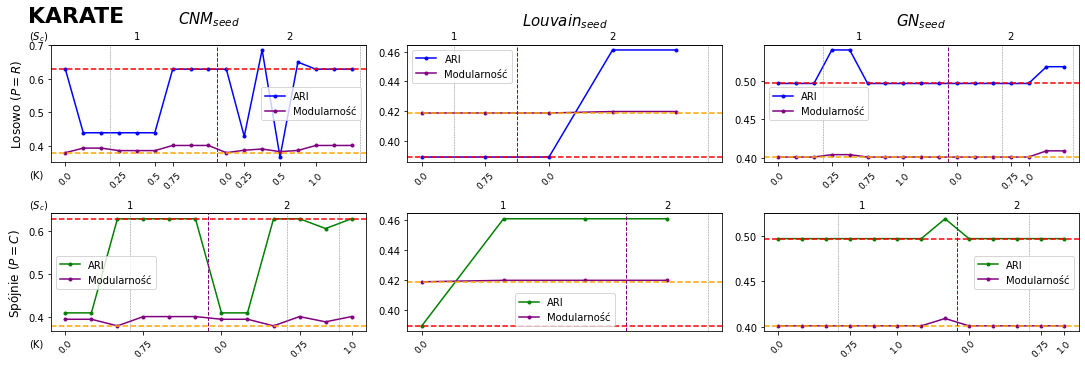

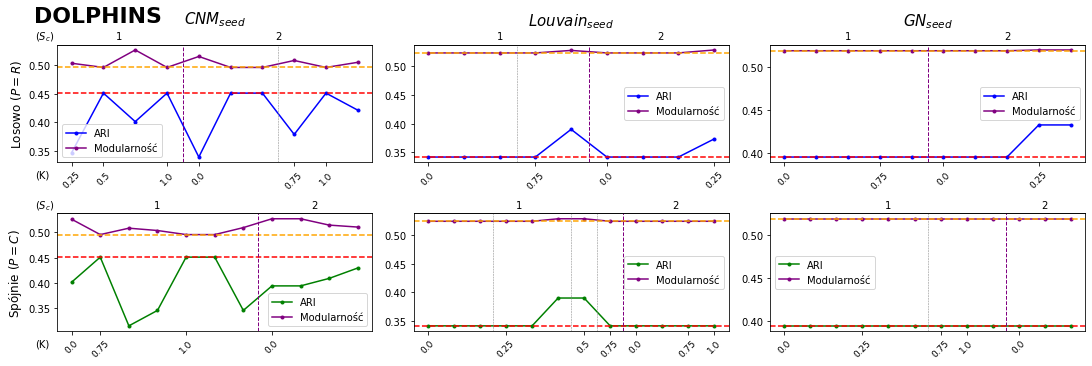

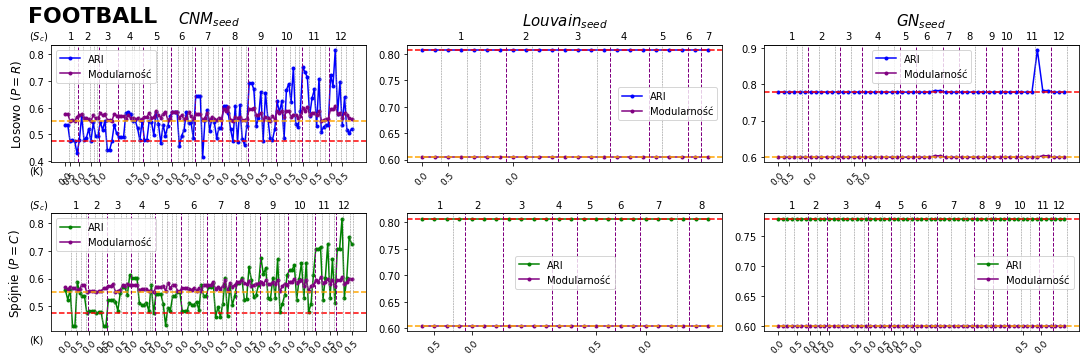

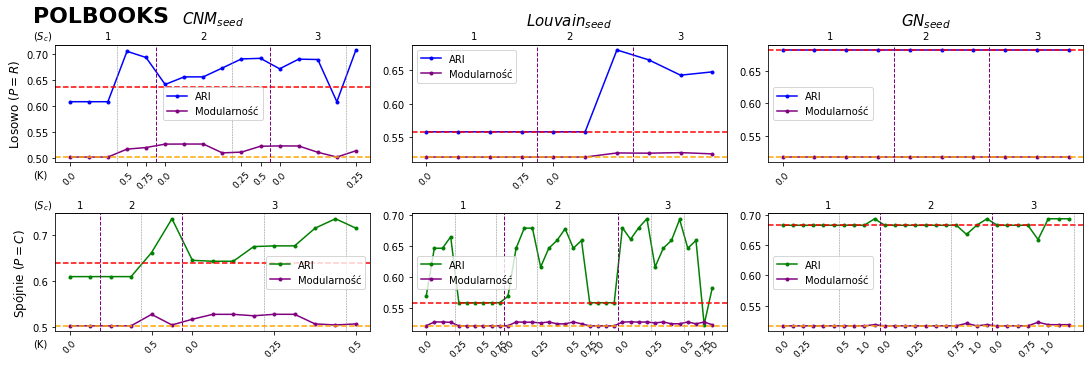

In [40]:
print_plots_q_not_worse(df, fdata, 'ari')

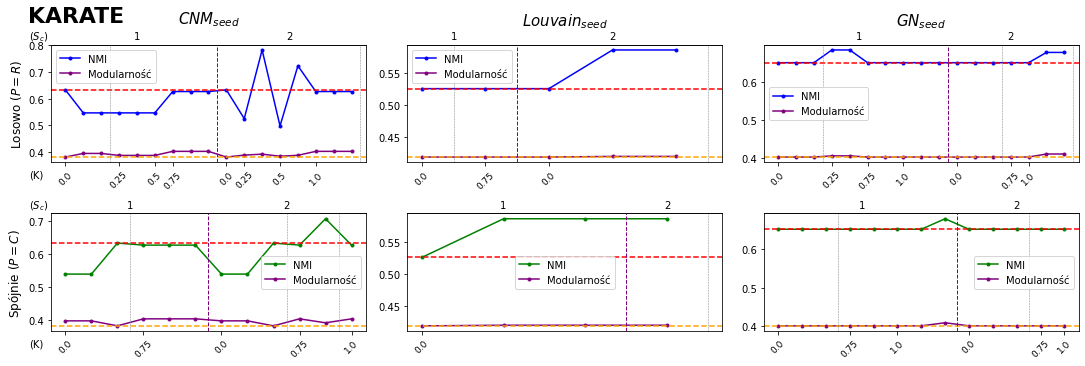

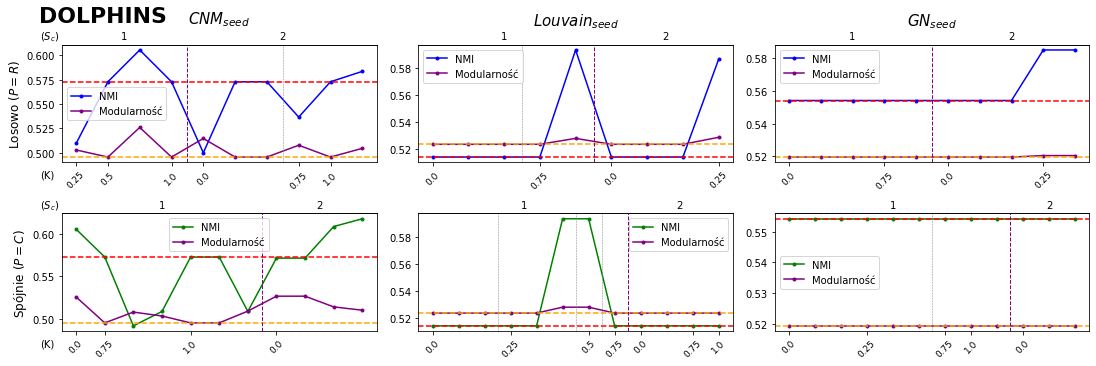

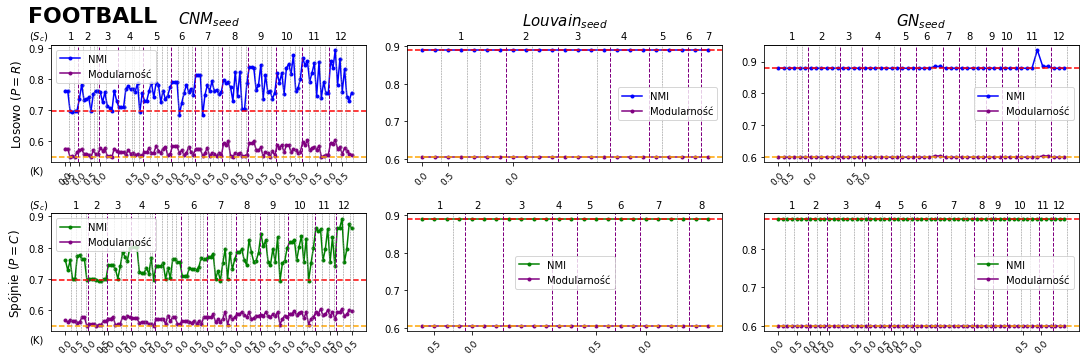

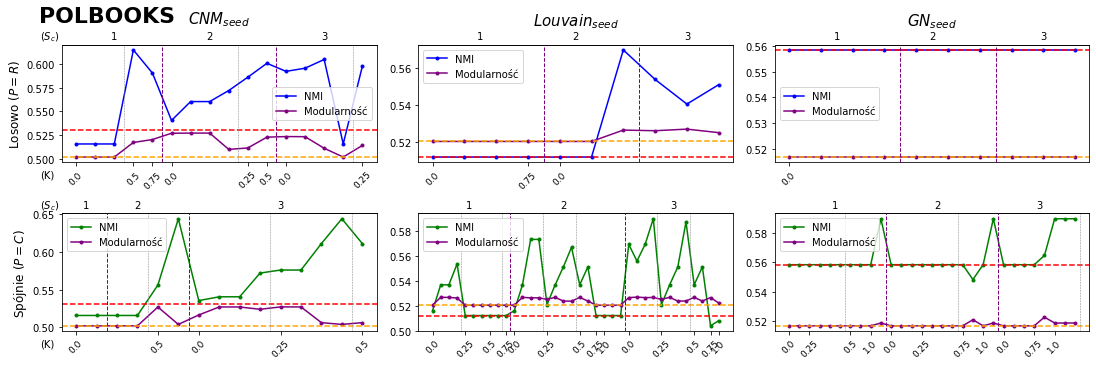

In [41]:
print_plots_q_not_worse(df, fdata, 'nmi')

In [35]:
def print_plots_cc_same_as_gt(df, data, param):
    for g in ['karate', 'dolphins', 'football', 'polbooks']:
        
        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
        main_title = g.upper()
        fig.suptitle(main_title, fontsize=22, x=0.01, weight='bold', horizontalalignment='left')
        fig.tight_layout(h_pad=3)
        
        for i, alg in enumerate(['fastGreedy', 'louvain', 'edgeBetweenness']):
            baseline = next(x for x in data['baseline'] if x['graph'] == g and x['algorithm'] == alg)
            bp = baseline[param]
            
            bq = {
                'karate': 2,
                'dolphins': 2,
                'football': 12,
                'polbooks': 3
            }
            
            
            alg_seed = alg + 'Seed'
            curr = df[(df['graph'] == g) & (df['algorithm'] == alg_seed) & (df['communitiesCount'] == bq[g])]
            
            axes[0, i].set_title(ALGO_LABELS[alg_seed], fontsize=15)
            
            for (j, structure) in enumerate(['RANDOM', 'CONNECTED']):
                df_plot = curr[curr['seedStructureParam'] == structure].reset_index(drop=True)
                df_plot['index'] = df_plot.index.values
    
                seed_size_max_idxs = list(df_plot[df_plot['seedSizeParam'] == 0.5].index)
        
                max_seeds_count = df_plot['seedCountParam'].max()
    
                color = 'blue' if j == 0 else 'green'

                curr_ax = axes[j, i]
                
                pl = df_plot.plot(y=param, x='index', kind='line', ax=curr_ax,
                                  color=color, style='.-', label=PARAM_LABELS[param])
                
                pl = df_plot.plot(y='modularity', x='index', kind='line', ax=curr_ax,
                                  color='purple', style='.-', label=PARAM_LABELS['modularity'])
                
                pl.axhline(bp, color="red", linestyle="--")

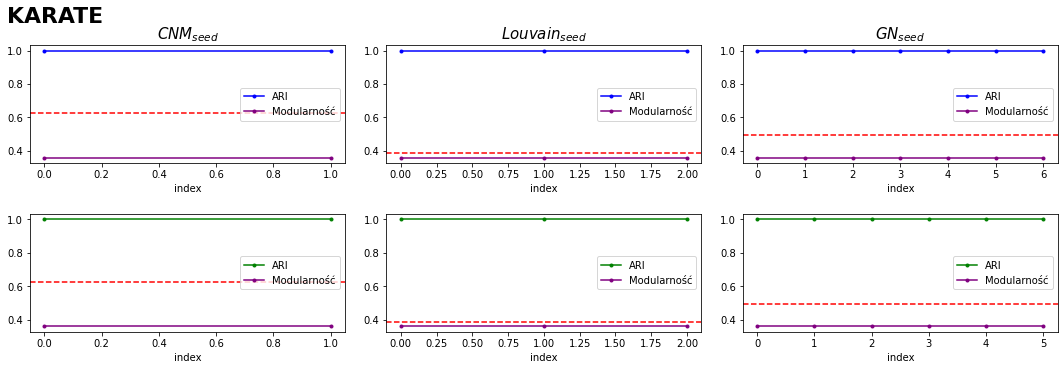

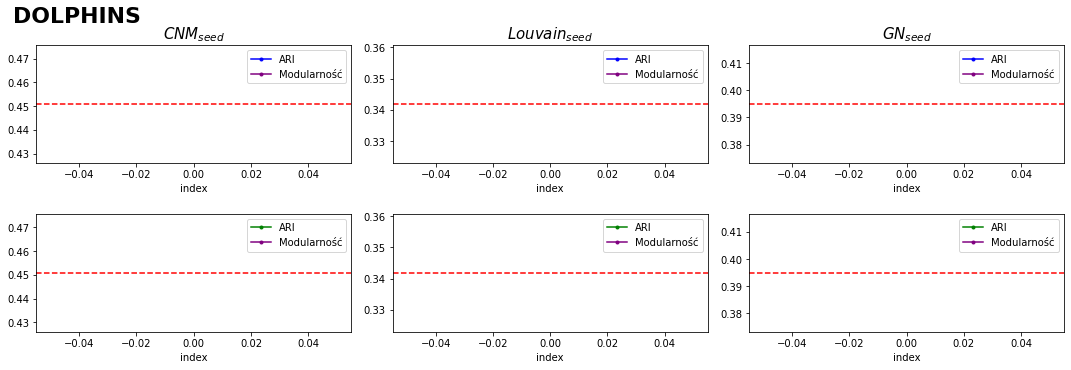

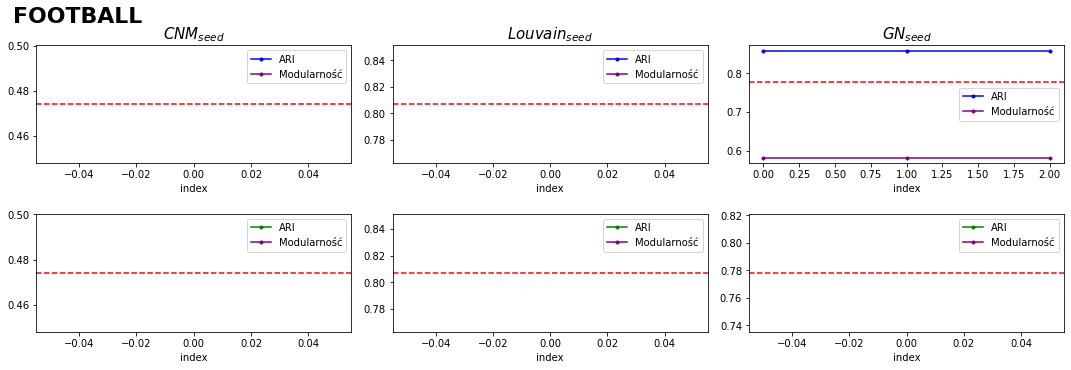

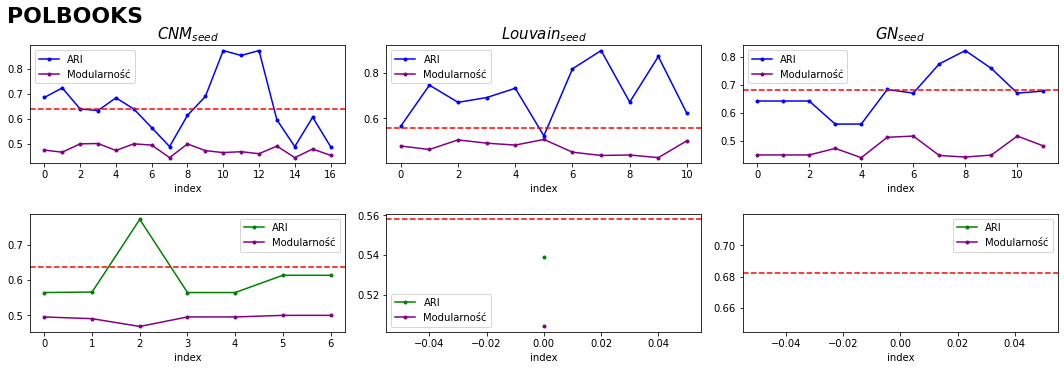

In [36]:
print_plots_cc_same_as_gt(df, fdata, 'ari')

In [30]:
# Expected value for (algorithm, graph)
def print_ev(df, data, param):
    for i, alg in enumerate(['fastGreedy', 'louvain', 'edgeBetweenness']):    
        for g in ['karate', 'dolphins', 'football', 'polbooks']:        
            baseline = next(x for x in data['baseline'] if x['graph'] == g and x['algorithm'] == alg)
            b = baseline[param]
            
            alg_seed = alg + 'Seed'
            curr = df[(df['graph'] == g) & (df['algorithm'] == alg_seed)]
            m = curr[param].mean()
            diff = m - b
            print(f'{alg}, {g}: {b} :: >{m}<; {diff}   {"BAD" if diff < 0 else ""} ')
        print()

In [36]:
# Expected value for (algorithm, graph)
def print_ev_by_structure(df, data, param):
    for (j, structure) in enumerate(['RANDOM', 'CONNECTED']):
        print(structure)
        for (i, alg) in enumerate(['fastGreedy', 'louvain', 'edgeBetweenness']):    
            for g in ['karate', 'dolphins', 'football', 'polbooks']:        
                baseline = next(x for x in data['baseline'] if x['graph'] == g and x['algorithm'] == alg)
                b = baseline[param]

                alg_seed = alg + 'Seed'
                curr = df[(df['graph'] == g) & (df['algorithm'] == alg_seed)]
                curr = curr[curr['seedStructureParam'] == structure].reset_index(drop=True)
                m = curr[param].mean()
                diff = m - b
                print(f'{alg}, {g}: {b} :: >{m}<; {diff}   {"BAD" if diff < 0 else ""} ')
            print()
        print()


In [37]:
print_ev(df, fdata, 'nmi')
print('\n\n****************************************\n\n')
print_ev(raw_df, data, 'nmi')

fastGreedy, karate: 0.6330127509079122 :: >0.7019998330601511<; 0.06898708215223892    
fastGreedy, dolphins: 0.5727004718449731 :: >0.6001973562942333<; 0.02749688444926024    
fastGreedy, football: 0.6977316621164369 :: >0.764098922663154<; 0.06636726054671716    
fastGreedy, polbooks: 0.5308141953494561 :: >0.5718843623442245<; 0.0410701669947684    

louvain, karate: 0.525381581087972 :: >0.6422385916121909<; 0.11685701052421893    
louvain, dolphins: 0.5138894311249274 :: >0.5600885220303131<; 0.046199090905385765    
louvain, football: 0.8903166312052428 :: >0.8839243907931641<; -0.0063922404120787535   BAD 
louvain, polbooks: 0.5121330361945668 :: >0.5506835586657045<; 0.03855052247113766    

edgeBetweenness, karate: 0.6518455586747899 :: >0.7528033495213932<; 0.10095779084660328    
edgeBetweenness, dolphins: 0.5541604990476865 :: >0.5698787393069389<; 0.015718240259252392    
edgeBetweenness, football: 0.87888840621752 :: >0.8812876877432982<; 0.002399281525778285    
edgeBet

In [38]:
print_ev_by_structure(df, fdata, 'nmi')
print('\n\n****************************************\n\n')
print_ev_by_structure(raw_df, data, 'nmi')

RANDOM
fastGreedy, karate: 0.6330127509079122 :: >0.692669317985361<; 0.05965656707744882    
fastGreedy, dolphins: 0.5727004718449731 :: >0.6182556549203486<; 0.04555518307537554    
fastGreedy, football: 0.6977316621164369 :: >0.7666291050707871<; 0.06889744295435019    
fastGreedy, polbooks: 0.5308141953494561 :: >0.5879448756584171<; 0.05713068030896107    

louvain, karate: 0.525381581087972 :: >0.6517893567507201<; 0.1264077756627482    
louvain, dolphins: 0.5138894311249274 :: >0.5878736552458662<; 0.07398422412093886    
louvain, football: 0.8903166312052428 :: >0.8797354663267534<; -0.01058116487848948   BAD 
louvain, polbooks: 0.5121330361945668 :: >0.5596888686806079<; 0.047555832486041005    

edgeBetweenness, karate: 0.6518455586747899 :: >0.7524216605678667<; 0.10057610189307686    
edgeBetweenness, dolphins: 0.5541604990476865 :: >0.575450379515444<; 0.021289880467757483    
edgeBetweenness, football: 0.87888840621752 :: >0.8937458814706816<; 0.014857475253161612    
edg

In [39]:
print_ev(df, fdata, 'ari')
print('\n\n****************************************\n\n')
print_ev(raw_df, data, 'ari')

fastGreedy, karate: 0.6275185781046504 :: >0.6636659838503033<; 0.036147405745652894    
fastGreedy, dolphins: 0.45085458501055603 :: >0.4597477029479697<; 0.008893117937413653    
fastGreedy, football: 0.4740983153122243 :: >0.5508483856222554<; 0.07675007031003106    
fastGreedy, polbooks: 0.6378969874240921 :: >0.6499684112265537<; 0.012071423802461623    

louvain, karate: 0.38924111431316055 :: >0.5604594560505798<; 0.17121834173741923    
louvain, dolphins: 0.34186883932177226 :: >0.4062307686528541<; 0.06436192933108187    
louvain, football: 0.8069408992735121 :: >0.7758697313010059<; -0.031071167972506197   BAD 
louvain, polbooks: 0.5579847971479144 :: >0.6139706097032599<; 0.055985812555345515    

edgeBetweenness, karate: 0.4967320261437909 :: >0.6526223261304988<; 0.15589029998670784    
edgeBetweenness, dolphins: 0.39491146861748627 :: >0.4398939100084676<; 0.04498244139098134    
edgeBetweenness, football: 0.7781023261432491 :: >0.7713604021209612<; -0.006741924022287904 

In [40]:
print_ev_by_structure(df, fdata, 'ari')
print('\n\n****************************************\n\n')
print_ev_by_structure(raw_df, data, 'ari')

RANDOM
fastGreedy, karate: 0.6275185781046504 :: >0.6516120768591012<; 0.02409349875445077    
fastGreedy, dolphins: 0.45085458501055603 :: >0.4818381178672016<; 0.030983532856645568    
fastGreedy, football: 0.4740983153122243 :: >0.549197074743155<; 0.07509875943093075    
fastGreedy, polbooks: 0.6378969874240921 :: >0.6622193002992224<; 0.024322312875130314    

louvain, karate: 0.38924111431316055 :: >0.5784307532601136<; 0.18918963894695306    
louvain, dolphins: 0.34186883932177226 :: >0.43483541263269926<; 0.092966573310927    
louvain, football: 0.8069408992735121 :: >0.7560126038059318<; -0.050928295467580265   BAD 
louvain, polbooks: 0.5579847971479144 :: >0.6113622251143145<; 0.053377427966400104    

edgeBetweenness, karate: 0.4967320261437909 :: >0.6489191287808199<; 0.152187102637029    
edgeBetweenness, dolphins: 0.39491146861748627 :: >0.448879689745751<; 0.053968221128264715    
edgeBetweenness, football: 0.7781023261432491 :: >0.7893833285249833<; 0.011281002381734129

In [68]:
def format_val(v, d):
    if (d > 0):
        return f"\\textbf{{{v:.4f}}}"
    return f"{v:.4f}"


def print_ev_table(df, data):
    vals = {}
    
    for i, alg in enumerate(['fastGreedy', 'louvain', 'edgeBetweenness']):
        vals[alg] = {}
        for g in ['karate', 'dolphins', 'football', 'polbooks']:
            vals[alg][g] = {}
            
            for param in ['ari', 'nmi']:
                baseline = next(x for x in data['baseline'] if x['graph'] == g and x['algorithm'] == alg)
                b = baseline[param]

                alg_seed = alg + 'Seed'
                curr = df[(df['graph'] == g) & (df['algorithm'] == alg_seed)]
                m = curr[param].mean()
                d = m - b
                
                vals[alg][g][param + 'B'] = format_val(b, d)
                vals[alg][g][param + 'E'] = format_val(m, d)
                vals[alg][g][param + 'D'] = format_val(d, d)
            
            
    
    print('\\begin{table}[h!]')
    print('    \\centering')
    print('    \\begin{tabular}{l || l | c c c} ')
    
    print('    Algorytm & Sieć & $B_{ARI}$ & $EV_{ARI}$ & $EV_{ARI} - B_{ARI}$ \\\\')
    print('    \\hline')
    print('    \\hline')
    
    for alg in ['fastGreedy', 'louvain', 'edgeBetweenness']:
        for i, g in enumerate(['karate', 'dolphins', 'football', 'polbooks']):
            r = vals[alg][g]
            g_str = f"{g.capitalize()}"
            alg_str = f"\\textbf{{{ALGO_LABELS[alg + 'Seed']}}}" if i == 0 else ''
            print(f"    {alg_str} & {g_str} & {r['ariB']} & {r['ariE']} & {r['ariD']} \\\\")
        print('    \\hline')
    
    print('    \\end{tabular}')
    print('\\end{table}')
    
    print()
    
    print('\\begin{table}[h!]')
    print('    \\centering')
    print('    \\begin{tabular}{l || l | c c c} ')
    
    print('    Algorytm & Sieć & $B_{NMI}$ & $EV_{NMI}$ & $EV_{NMI} - B_{NMI}$ \\\\')
    print('    \\hline')
    print('    \\hline')
    
    for alg in ['fastGreedy', 'louvain', 'edgeBetweenness']:
        for i, g in enumerate(['karate', 'dolphins', 'football', 'polbooks']):
            r = vals[alg][g]
            g_str = f"{g.capitalize()}"
            alg_str = f"\\textbf{{{ALGO_LABELS[alg + 'Seed']}}}" if i == 0 else ''
            print(f"    {alg_str} & {g_str} & {r['nmiB']} & {r['nmiE']} & {r['nmiD']} \\\\")
        print('    \\hline')
    
    print('    \\end{tabular}')
    print('\\end{table}')

In [69]:
print_ev_table(df, fdata)

\begin{table}[h!]
    \centering
    \begin{tabular}{l || l | c c c} 
    Algorytm & Sieć & $B_{ARI}$ & $EV_{ARI}$ & $EV_{ARI} - B_{ARI}$ \\
    \hline
    \hline
    \textbf{CNM\seed} & Karate & \textbf{0.6275} & \textbf{0.6637} & \textbf{0.0361} \\
     & Dolphins & \textbf{0.4509} & \textbf{0.4597} & \textbf{0.0089} \\
     & Football & \textbf{0.4741} & \textbf{0.5508} & \textbf{0.0768} \\
     & Polbooks & \textbf{0.6379} & \textbf{0.6500} & \textbf{0.0121} \\
    \hline
    \textbf{Louvain\seed} & Karate & \textbf{0.3892} & \textbf{0.5605} & \textbf{0.1712} \\
     & Dolphins & \textbf{0.3419} & \textbf{0.4062} & \textbf{0.0644} \\
     & Football & 0.8069 & 0.7759 & -0.0311 \\
     & Polbooks & \textbf{0.5580} & \textbf{0.6140} & \textbf{0.0560} \\
    \hline
    \textbf{GN\seed} & Karate & \textbf{0.4967} & \textbf{0.6526} & \textbf{0.1559} \\
     & Dolphins & \textbf{0.3949} & \textbf{0.4399} & \textbf{0.0450} \\
     & Football & 0.7781 & 0.7714 & -0.0067 \\
     & Polbooks 